In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Question 1 

### Forecasting airlines dataset

In [2]:
airlines=pd.read_excel("/Users/apple/Downloads/Airlines+Data.xlsx")

In [3]:
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
airlines['Month'] = pd.to_datetime(airlines['Month'], infer_datetime_format=True)
indexedDataset = airlines.set_index(['Month'])

from datetime import datetime
indexedDataset['1995-03']
indexedDataset['1995-03':'1995-06']
indexedDataset['1995']

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
1995-07-01,148
1995-08-01,148
1995-09-01,136


In [5]:
len(indexedDataset)

96

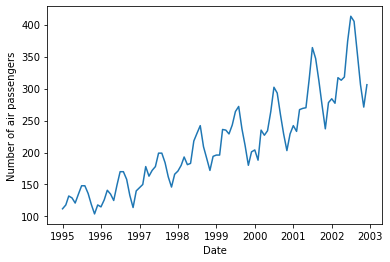

In [6]:
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)


In [7]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


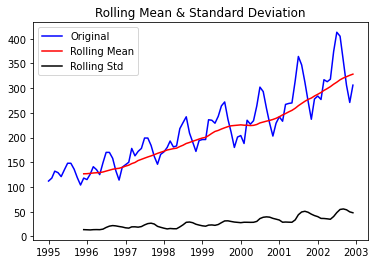

In [8]:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [9]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
Lags Used                      12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


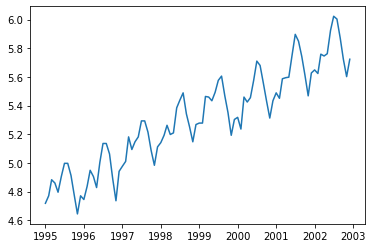

In [10]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

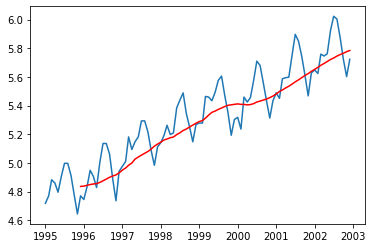

In [11]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [12]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142
1996-05-01,-0.027529
1996-06-01,0.139881
1996-07-01,0.260184
1996-08-01,0.248635


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

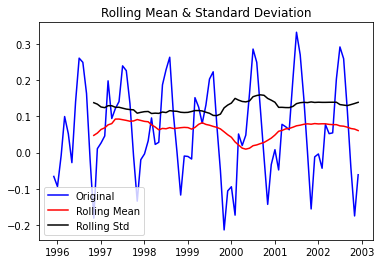

Results of Dickey-Fuller Test:
Test Statistic                 -1.910930
p-value                         0.326937
#Lags Used                     12.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [14]:
test_stationarity(datasetLogScaleMinusMovingAverage)


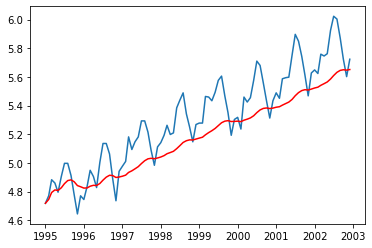

In [15]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

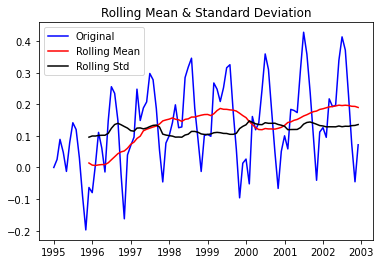

Results of Dickey-Fuller Test:
Test Statistic                 -2.835036
p-value                         0.053441
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [16]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

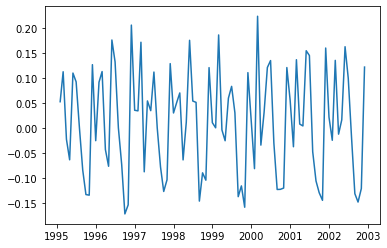

In [17]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

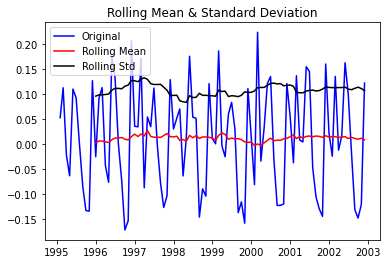

Results of Dickey-Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [18]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

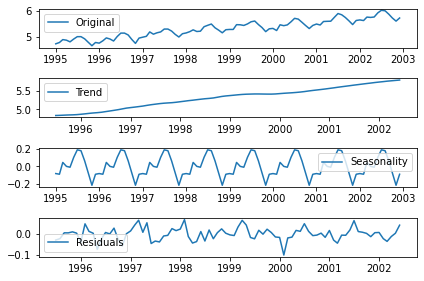

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [20]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
#test_stationarity(decomposedLogData)

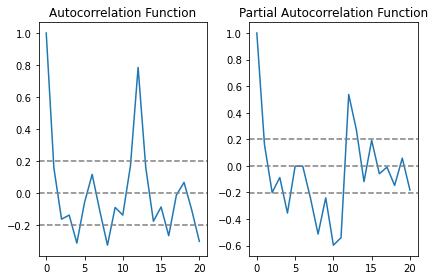

In [21]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR model


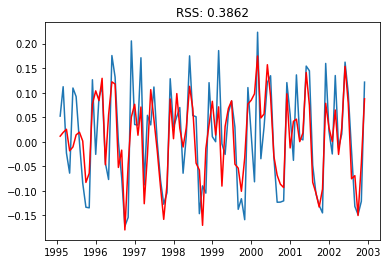

In [22]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(10, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
print('Plotting AR model')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR model


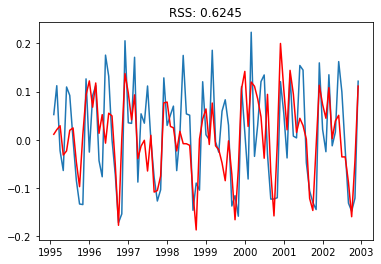

In [23]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0,1,6))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
print('Plotting AR model')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 0.2043')

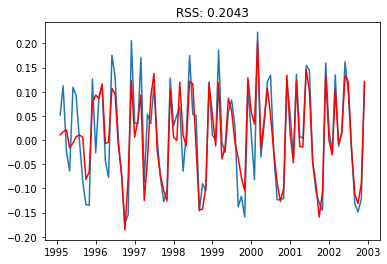

In [24]:
model = ARIMA(indexedDataset_logScale, order=(10,1,6))  
results_ARIMA = model.fit()  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Passengers"])**2))

In [25]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1995-02-01    0.010853
1995-03-01    0.017147
1995-04-01    0.021199
1995-05-01   -0.016026
1995-06-01   -0.006197
dtype: float64


In [26]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1995-02-01    0.010853
1995-03-01    0.028000
1995-04-01    0.049199
1995-05-01    0.033173
1995-06-01    0.026977
dtype: float64


In [27]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Passengers'].iloc[0], index=indexedDataset_logScale['Passengers'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1995-01-01    4.718499
1995-02-01    4.729352
1995-03-01    4.746498
1995-04-01    4.767698
1995-05-01    4.751672
dtype: float64

Text(0.5, 1.0, 'RMSE: 33.5745')

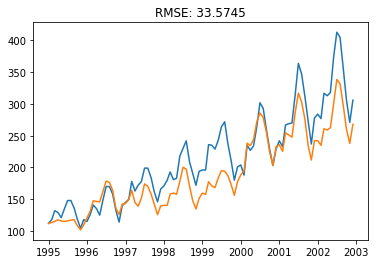

In [28]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset["Passengers"])**2)/len(indexedDataset["Passengers"])))


In [29]:
train=indexedDataset_logScale.iloc[:90]
test=indexedDataset_logScale.iloc[90:]

In [30]:
len(train),len(test)

(90, 6)

In [31]:
test['Passengers']

Month
2002-07-01    6.023448
2002-08-01    6.003887
2002-09-01    5.872118
2002-10-01    5.723585
2002-11-01    5.602119
2002-12-01    5.723585
Name: Passengers, dtype: float64

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
model1 = ARIMA(train, order=(10,1,6))  
results = model1.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [34]:
start=len(train)
end=len(indexedDataset)-1
predictions=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions = predictions.rename('ARIMA(10,1,6) Predictions')


In [35]:
predictions,test.Passengers

(2002-07-01    6.066609
 2002-08-01    6.008133
 2002-09-01    5.917682
 2002-10-01    5.770552
 2002-11-01    5.645294
 2002-12-01    5.769304
 Freq: MS, Name: ARIMA(10,1,6) Predictions, dtype: float64,
 Month
 2002-07-01    6.023448
 2002-08-01    6.003887
 2002-09-01    5.872118
 2002-10-01    5.723585
 2002-11-01    5.602119
 2002-12-01    5.723585
 Name: Passengers, dtype: float64)

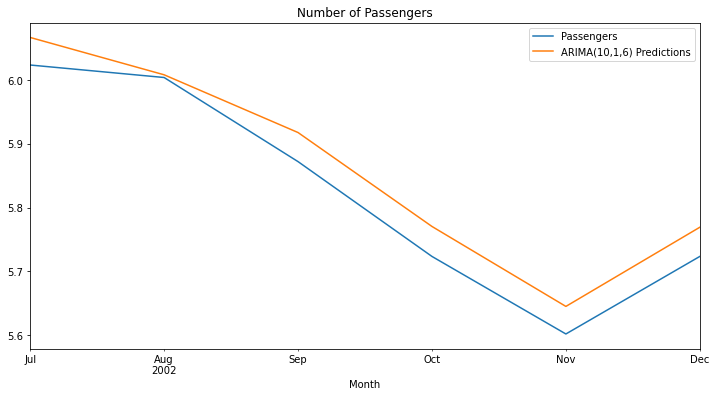

In [36]:
title = 'Number of Passengers'
ylabel='Passengers'
xlabel='Period' 

test['Passengers'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Passengers'], predictions)
error.round(4)

0.0017

In [38]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Passengers'], predictions)
error.round(4)

0.0411

In [39]:
test['Passengers'].mean()

5.824790245721242

In [40]:
model2 = ARIMA(indexedDataset_logScale['Passengers'], order=(7,1,6))  
results1 = model2.fit() 
fcast = results1.predict(len(indexedDataset_logScale['Passengers'])-4,len(indexedDataset_logScale['Passengers'])+8,typ='levels').rename('ARIMA(3,1,3) Forecast')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
fcast

2002-09-01    5.948010
2002-10-01    5.752344
2002-11-01    5.607504
2002-12-01    5.712731
2003-01-01    5.799631
2003-02-01    5.727937
2003-03-01    5.776065
2003-04-01    5.837226
2003-05-01    5.871247
2003-06-01    6.062849
2003-07-01    6.163954
2003-08-01    6.069117
2003-09-01    6.033111
Freq: MS, Name: ARIMA(3,1,3) Forecast, dtype: float64

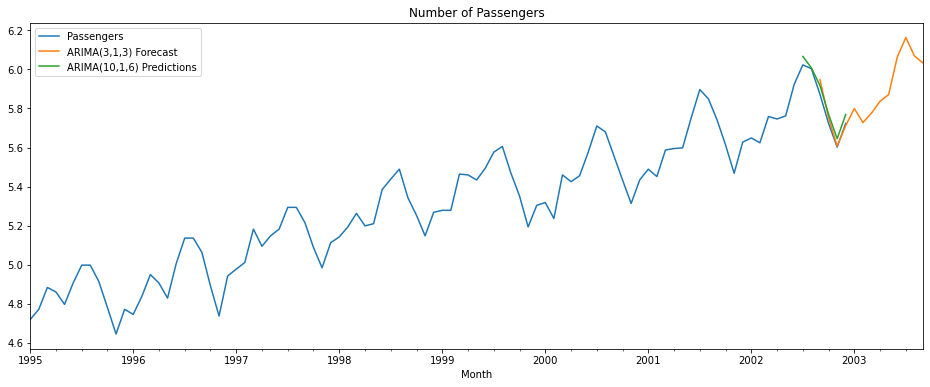

In [42]:
title = 'Number of Passengers'
ylabel='Passengers'
xlabel='Period' 

indexedDataset_logScale.plot(legend=True,figsize=(16,6),title=title)
fcast.plot(legend=True)
predictions.plot(legend=True)
plt.show()

## Question 2

### Forecasting for CocaCola dataset

In [43]:
cocacola= pd.read_excel("/Users/apple/Downloads/CocaCola_Sales_Rawdata.xlsx")

In [44]:
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<AxesSubplot:>

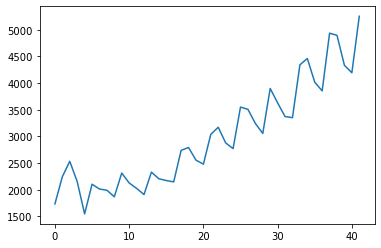

In [45]:
quarter=['Q1','Q2','Q3','Q4']
n=cocacola['Quarter'][0]
n[0:2]

cocacola['quarter']=0

for i in range(42):
    n=cocacola['Quarter'][i]
    cocacola['quarter'][i]=n[0:2]
    
dummy=pd.DataFrame(pd.get_dummies(cocacola['quarter']))

coco=pd.concat((cocacola,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']

log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales

train_2= coco.head(38)
test_2=coco.tail(4)
coco.Sales.plot()

In [46]:
coco.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


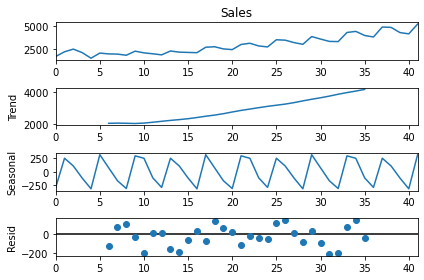

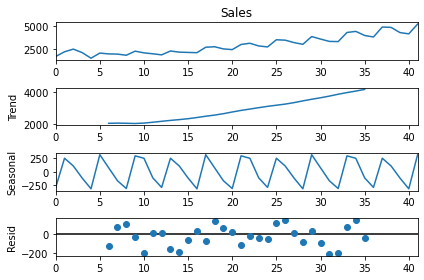

In [47]:
import statsmodels.graphics.tsaplots as tsa_plots
decompose_ts = seasonal_decompose(coco['Sales'],period=12)
decompose_ts.plot()

In [48]:
import statsmodels.formula.api as smf

## linear model
linear= smf.ols('Sales~t',data=train_2).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test_2['t'])))
rmselin=np.sqrt((np.mean(np.array(test_2['Sales'])-np.array(predlin))**2))
rmselin

421.17878760022745

In [49]:
## Quadratic model
quad=smf.ols('Sales~t+t_square',data=train_2).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test_2[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test_2['Sales'])-np.array(predquad))**2))
rmsequad

475.56183518315606

In [50]:
#exponential model
expo=smf.ols('log_Sales~t',data=train_2).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test_2['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test_2['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

466.2479731067161

In [51]:
#additive seasonality
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train_2).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test_2[['Q1','Q2','Q3','Q4']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test_2['Sales'])-np.array(predadd))**2))
rmseadd

1860.0238154547274

In [52]:
#additive seasonality with linear trend
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train_2).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test_2[['t','Q1','Q2','Q3','Q4']])))
predaddlinear

38    4292.265126
39    4066.761792
40    3961.769195
41    4639.214094
dtype: float64

In [53]:
rmseaddlinear=np.sqrt(np.mean((np.array(test_2['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

464.9829023982243

In [54]:
#additive seasonality with quadratic trend
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train_2).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test_2[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test_2['Sales'])-np.array(predaddquad))**2))
rmseaddquad

301.73800719349674

In [55]:
#multiplicative seasonality
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train_2).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test_2[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test_2['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1963.3896400779668

In [56]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train_2).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test_2[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test_2['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

225.52439049827362

In [57]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train_2).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test_2[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test_2['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

581.8457187963156

In [58]:
#tabulating the rmse values

data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
data

{'Model': 0    rmse_mul_quad
 1          rmseadd
 2    rmseaddlinear
 3      rmseaddquad
 4         rmseexpo
 5          rmselin
 6          rmsemul
 7        rmsemulin
 8         rmsequad
 dtype: object,
 'Values': 0     581.845719
 1    1860.023815
 2     464.982902
 3     301.738007
 4     466.247973
 5     421.178788
 6    1963.389640
 7     225.524390
 8     475.561835
 dtype: float64}

In [59]:
Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quad,581.845719
1,rmseadd,1860.023815
2,rmseaddlinear,464.982902
3,rmseaddquad,301.738007
4,rmseexpo,466.247973
5,rmselin,421.178788
6,rmsemul,1963.389640
7,rmsemulin,225.524390
8,rmsequad,475.561835


In [60]:
coco.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [61]:
final= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train_2).fit()
pred= pd.Series(final.predict(test_2))
actual_pred = np.exp(pred)
actual_pred

38    4555.076459
39    4224.164912
40    3983.650879
41    5074.659987
dtype: float64

In [62]:
pred,test_2

(38    8.423998
 39    8.348577
 40    8.289954
 41    8.532015
 dtype: float64,
    Quarter   Sales quarter  Q1  Q2  Q3  Q4   t  t_square  log_Sales
 38   Q3_95  4895.0      Q3   0   0   1   0  39      1521   8.495970
 39   Q4_95  4333.0      Q4   0   0   0   1  40      1600   8.374015
 40   Q1_96  4194.0      Q1   1   0   0   0  41      1681   8.341410
 41   Q2_96  5253.0      Q2   0   1   0   0  42      1764   8.566555)

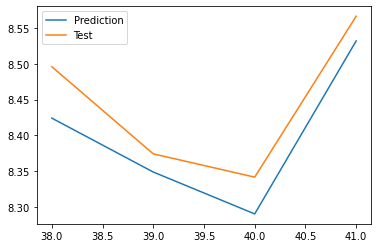

In [63]:
plt.plot(pred,label='Prediction')
plt.legend(loc='best')
plt.plot(test_2.log_Sales,label='Test')
plt.legend(loc='best')

In [64]:
pred_full=pd.Series(final.predict(coco))
actual_pred_full = np.exp(pred_full)
actual_pred_full.head()

0    1549.709886
1    1974.131516
2    1947.457062
3    1805.980615
4    1703.152319
dtype: float64

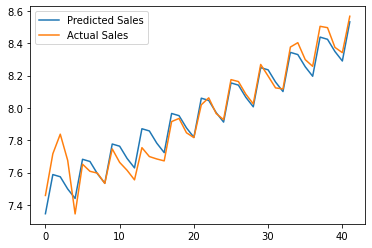

In [65]:
plt.plot(pred_full,label='Predicted Sales')
plt.plot(coco.log_Sales,label='Actual Sales')
plt.legend(loc='best')

In [66]:
from pmdarima import auto_arima 

In [67]:
stepwise_fit = auto_arima(coco['log_Sales'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-38.088, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-37.448, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-50.606, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-38.685, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-50.143, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-43.304, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.809 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  28.303
Date:                Mon, 27 Sep 2021   AIC                            -50.606
Time:                        22:41:09   BIC                            -45.465
Sample:                             0   HQIC                           -48.734
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0230      0.005      4.873      0.000       0.014       0.032
ma.L1         -0.8056      0.136     -5.909      0.000      -1.073      -0.538
sigma2         0.0143      0.003      4.587      0.000       0.008       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                 1.26
Prob(Q):                              0.36   Prob(JB):                         0.53
Heteroskedasticity (H):               0.52   Skew:                            -0.39
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
from statsmodels.tsa.arima_model import ARIMA

In [69]:
model3 = ARIMA(train_2['log_Sales'],order=(3,1,3))
results3 = model3.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   89
Model:                ARIMA(10, 1, 6)   Log Likelihood                 133.979
Method:                       css-mle   S.D. of innovations              0.041
Date:                Mon, 27 Sep 2021   AIC                           -231.958
Time:                        22:41:09   BIC                           -187.162
Sample:                    02-01-1995   HQIC                          -213.902
                         - 06-01-2002                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0113      0.001      8.773      0.000       0.009       0.014
ar.L1.D.Passengers      0.0413        nan        nan        nan         nan         nan
ar.L2.D.Passengers     -0.9784      0.000  -9534.079      0.000      -0.979      -0.978
ar.L3.D.Passengers      0.0368      0.002     22.277      0.000       0.034       0.040
ar.L4.D.Passengers     -0.8686      0.002   -470.035      0.000      -0.872      -0.865
ar.L5.D.Passengers     -0.0745      0.008     -9.478      0.000      -0.090      -0.059
ar.L6.D.Passengers     -0.8158      0.002   -486.563      0.000      -0.819      -0.812
ar.L7.D.Passengers     -0.1659      0.001   -116.228      0.000      -0.169      -0.163
ar.L8.D.Passengers     -0.7910   6.22e-05  -1.27e+04      0.000      -0.791      -0.791
ar.L9.D.Passengers     -0.0824      0.001   -129.101      0.000      -0.084      -0.081
ar.L10.D.Passengers    -0.8656      0.000  -3779.589      0.000      -0.866      -0.865
ma.L1.D.Passengers     -0.5276      0.095     -5.553      0.000      -0.714      -0.341
ma.L2.D.Passengers      0.8583      0.101      8.500      0.000       0.660       1.056
ma.L3.D.Passengers     -0.7326      0.140     -5.220      0.000      -1.008      -0.458
ma.L4.D.Passengers      0.6076      0.132      4.610      0.000       0.349       0.866
ma.L5.D.Passengers     -0.1983      0.098     -2.016      0.044      -0.391      -0.005
ma.L6.D.Passengers      0.5848      0.059      9.860      0.000       0.469       0.701
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8677           -0.4970j            1.0000           -0.0828
AR.2             0.8677           +0.4970j            1.0000            0.0828
AR.3             0.5096           -0.8853j            1.0215           -0.1669
AR.4             0.5096           +0.8853j            1.0215            0.1669
AR.5            -0.9251           -0.5011j            1.0521           -0.4210
AR.6            -0.9251           +0.5011j            1.0521            0.4210
AR.7            -0.5022           -0.8649j            1.0001           -0.3337
AR.8            -0.5022           +0.8649j            1.0001            0.3337
AR.9             0.0024           -1.0000j            1.0000           -0.2496
AR.10            0.0024           +1.0000j            1.0000            0.2496
MA.1             0.8955           -0.5707j            1.0619           -0.0903
MA.2             0.8955           +0.5707j            1.0619            0.0903
MA.3            -0.0119           -1.0504j            1.0505           -0.2518
MA.4            -0.0119           +1.0504j            1.0505            0.2518
MA.5            -0.7140           -0.9297j            1.172

In [70]:
start=len(train_2)
end=len(coco)-1
predictions = results3.predict(start=start, end=end, dynamic=False, typ='levels')
predictions = predictions.rename('ARIMA(3,1,3) Predictions')

In [71]:
np.exp(predictions),np.exp(test_2.log_Sales) 

(38    4779.50862
 39    4325.22790
 40    4250.26444
 41    5360.36155
 Name: ARIMA(3,1,3) Predictions, dtype: float64,
 38    4895.0
 39    4333.0
 40    4194.0
 41    5253.0
 Name: log_Sales, dtype: float64)

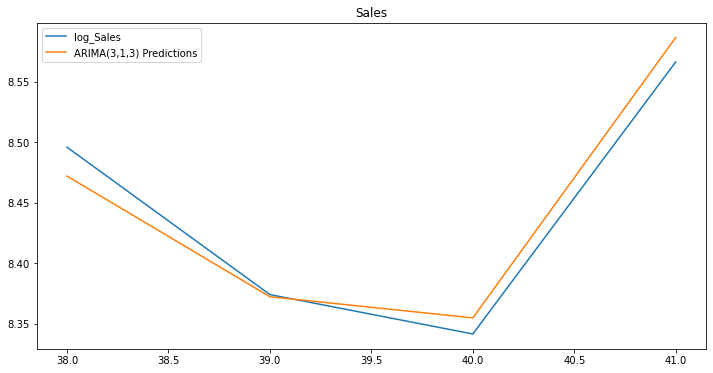

In [72]:
title = 'Sales'
ylabel='log_Sales'
xlabel='' 

test_2['log_Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
plt.show()

In [73]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_2['log_Sales'], predictions)
error.round(4)

0.0003

In [74]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_2['log_Sales'], predictions)
error.round(4)

0.017

In [75]:
test_2['log_Sales'].mean()

8.444487452280086

In [76]:
model4 = ARIMA(coco['log_Sales'],order=(3,2,2))
results4 = model4.fit()
fcast = results4.predict(len(coco)-2,len(coco)+5,typ='levels').rename('ARIMA(3,2,1) Forecast')

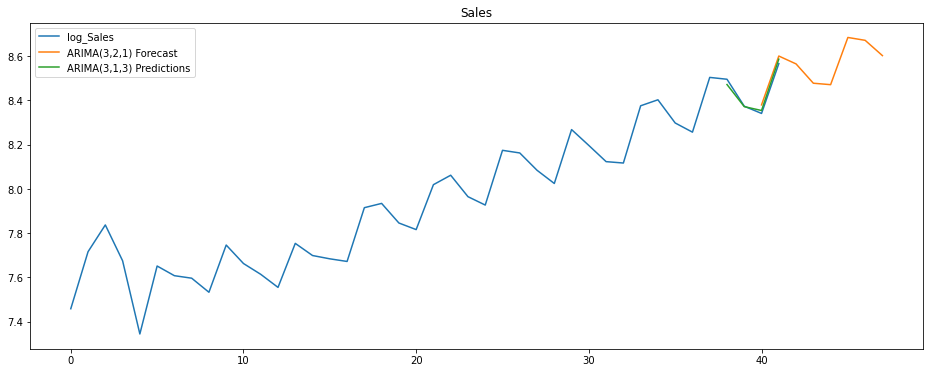

In [77]:
title = 'Sales'
ylabel='Sales'
xlabel='Period' 

coco['log_Sales'].plot(legend=True,figsize=(16,6),title=title)
fcast.plot(legend=True)
predictions.plot(legend=True)
plt.show()